In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Standard imports
import os
import sys
sys.path.append('..')  #To let jupyter notebook to look one folder up

#Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Local imports
from src.localpaths import RAW_DATA_PATH
from src.data.make_dataset import load_training_data

In [3]:
#Configuration for notebooks

# pd.options.display.max_columns = 100
pd.set_option('display.max_columns', 100)

# Load Data 

In [4]:
df = pd.read_csv(RAW_DATA_PATH)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Descriptive Statistics

In [6]:
df.shape

(7043, 21)

**There are 7043 observations and 20 features**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**TotalCharges is in `object` type, but it should be a `float`**

In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1071a5520>,
      dtype=object)

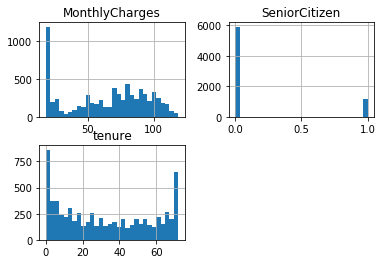

In [12]:
df.hist(bins = 30)

# Target Balance

In [13]:
round(df['Churn'].value_counts() / df.shape[0],2)

No     0.73
Yes    0.27
Name: Churn, dtype: float64

**Thus, _27%_ of the customers stopped doing business with the company**

# Loading Training data

In [14]:
X_train, y_train = load_training_data(clean = True)

In [15]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.30
1,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525.00
2,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.50
3,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25
4,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.70


In [16]:
y_train.head()

,Churn
0,Yes
1,No
2,No
3,No
4,Yes


# Basic Exploratory Data Analysis - Distribution of features

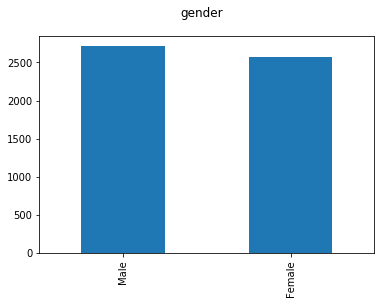

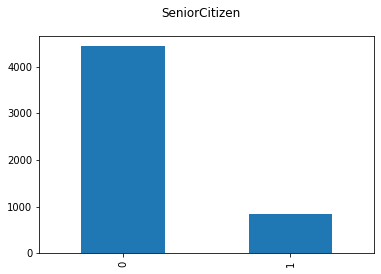

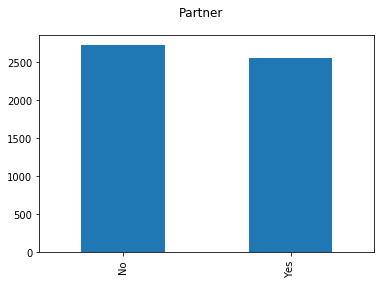

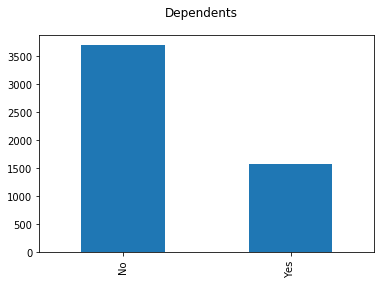

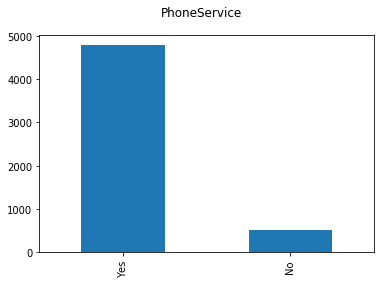

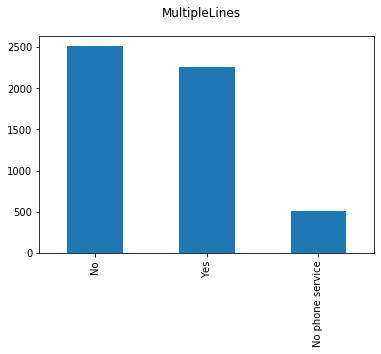

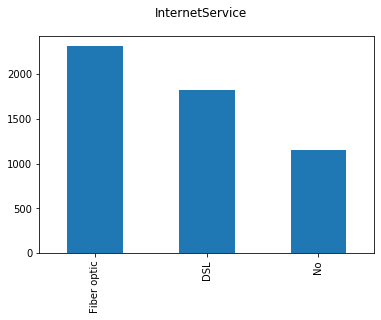

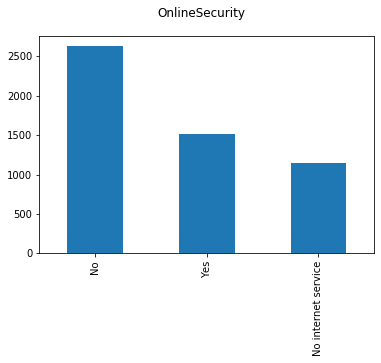

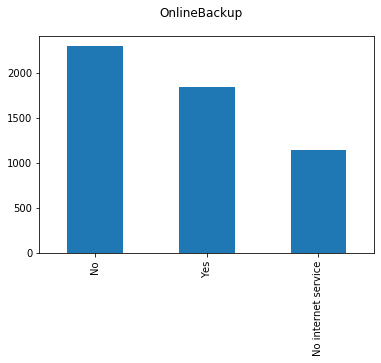

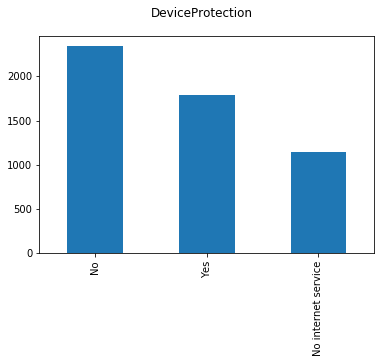

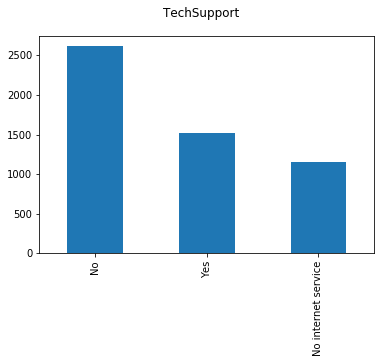

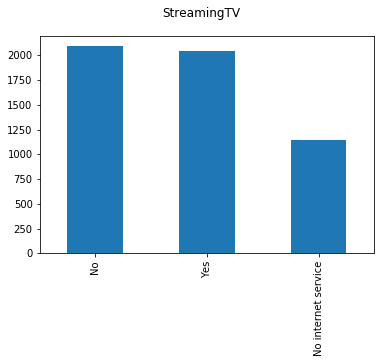

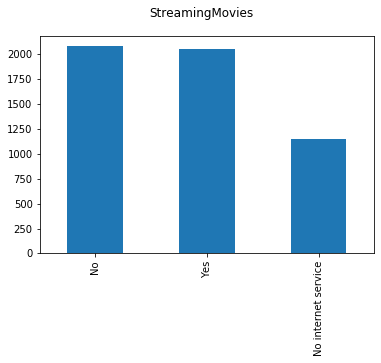

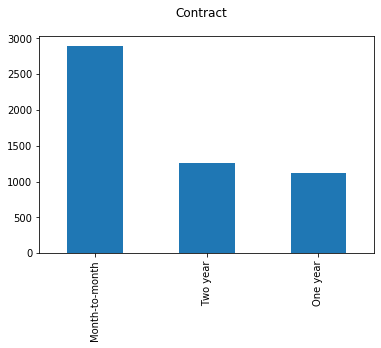

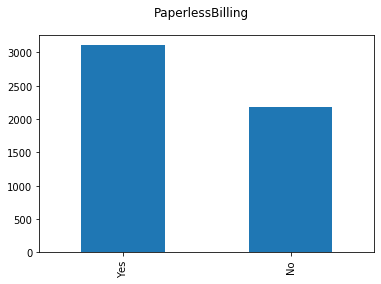

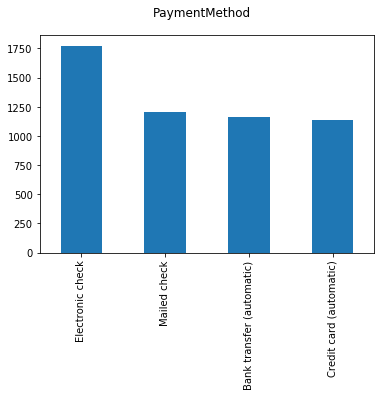

In [17]:
for col in X_train.columns:
    if X_train[col].nunique() <= 4:
        X_train[col].value_counts().plot(kind= 'bar')
        plt.suptitle(col)
        plt.show()
        

**Senior Citizen and Dependents are not balanced**

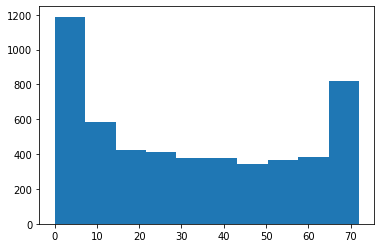

In [18]:
plt.hist(X_train['tenure'])
plt.grid(False)

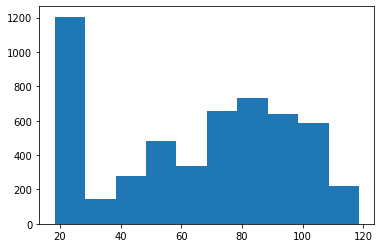

In [19]:
plt.hist(X_train['MonthlyCharges'])
plt.grid(False)

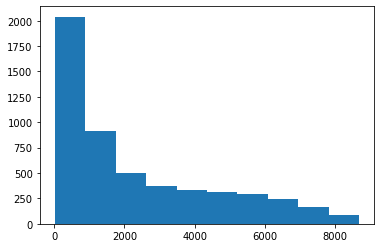

In [20]:
plt.hist(X_train['TotalCharges'])
plt.grid(False)

# Load Featurized data

In [22]:
X_train, y_train = load_training_data(final=True)

In [23]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,1,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,1,Electronic check,25.30,25.30
1,1,0,0,0,7,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,75.15,525.00
2,1,0,0,1,4,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer (automatic),20.05,85.50
3,1,0,0,0,29,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Credit card (automatic),76.00,2215.25
4,1,0,0,0,3,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Credit card (automatic),75.10,270.70
